1 - import

2 - plot data

3 - erroneous data check

4 - sample data

5 - plot sampled data

# import

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

In [4]:
#import data files
path = r'/Users/amritambe/Desktop/CareerF Python/Insta Cart Analysis'
df_vis = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Grouped_Customer.pkl'))

In [4]:
df_vis.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,customer_id,customer_order_number,orders_day_of_week,order_hour_of_day,days_between_last_order,first_order,product_id,...,_merge,price_range_loc,Busiest Days,busiest_hours_of_day,max_orders,loyalty_flag,avg_cust_spend,Customer_Spend,median_order_frequency,Order_Frequency
0,0,0,2539329,1,1,2,8,NaN,True,196,...,both,Mid Range Items,Regularly Busy Day,Average_Orders,10,Regular Customer,6.367797,Low Spender,20.5,Non-Frequent Spender
1,1,1,2398795,1,2,3,7,15.0,False,196,...,both,Mid Range Items,Least Busy Day,Average_Orders,10,Regular Customer,6.367797,Low Spender,20.5,Non-Frequent Spender
2,2,2,473747,1,3,3,12,21.0,False,196,...,both,Mid Range Items,Least Busy Day,Most_Orders,10,Regular Customer,6.367797,Low Spender,20.5,Non-Frequent Spender
3,3,3,2254736,1,4,4,7,29.0,False,196,...,both,Mid Range Items,Least Busy Day,Average_Orders,10,Regular Customer,6.367797,Low Spender,20.5,Non-Frequent Spender
4,4,4,431534,1,5,4,15,28.0,False,196,...,both,Mid Range Items,Least Busy Day,Most_Orders,10,Regular Customer,6.367797,Low Spender,20.5,Non-Frequent Spender


In [5]:
#show all columns
df_vis.columns.tolist()

['Unnamed: 0.1',
 'Unnamed: 0_x',
 'order_id',
 'customer_id',
 'customer_order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_between_last_order',
 'first_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'Unnamed: 0_y',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 '_merge',
 'price_range_loc',
 'Busiest Days',
 'busiest_hours_of_day',
 'max_orders',
 'loyalty_flag',
 'avg_cust_spend',
 'Customer_Spend',
 'median_order_frequency',
 'Order_Frequency']

# plot data

<AxesSubplot:>

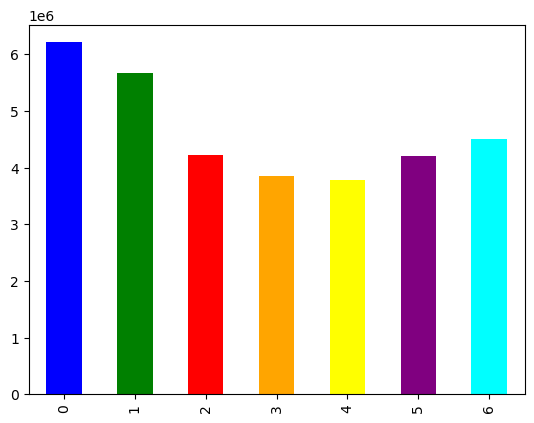

In [6]:
#plot value counts of day of order

df_vis['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['blue', 'green', 'red', 'orange', 'yellow', 'purple', 'cyan'])

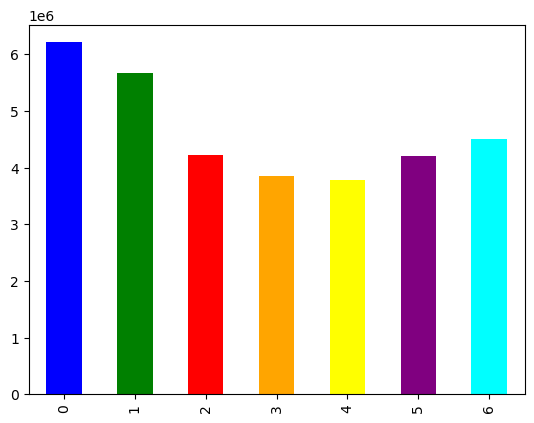

In [7]:
#save chart
bar = df_vis['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['blue', 'green', 'red', 'orange', 'yellow', 'purple', 'cyan'])
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Bar_Chart_DoW.png'))

<AxesSubplot:ylabel='Frequency'>

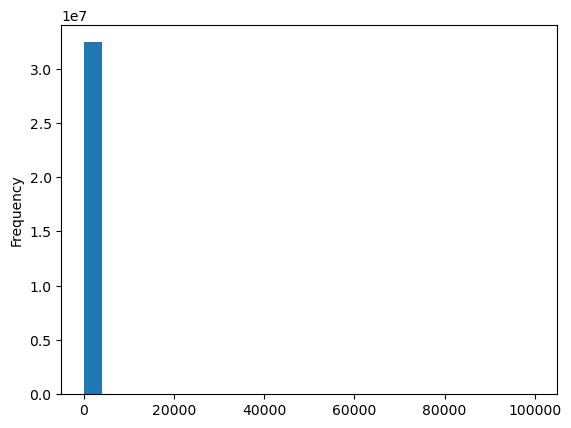

In [8]:
#histogram for prices

df_vis['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

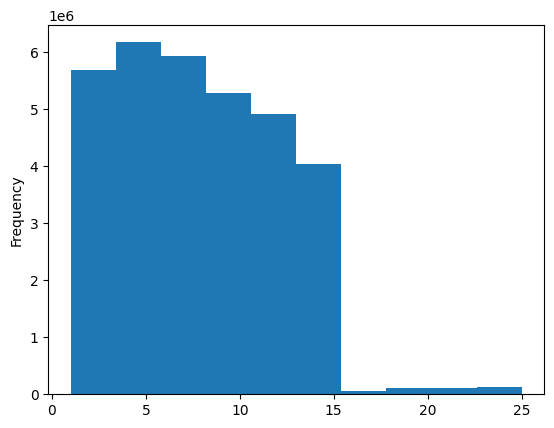

In [5]:
#histogram for prices

df_vis['prices'].plot.hist(bins = 10)

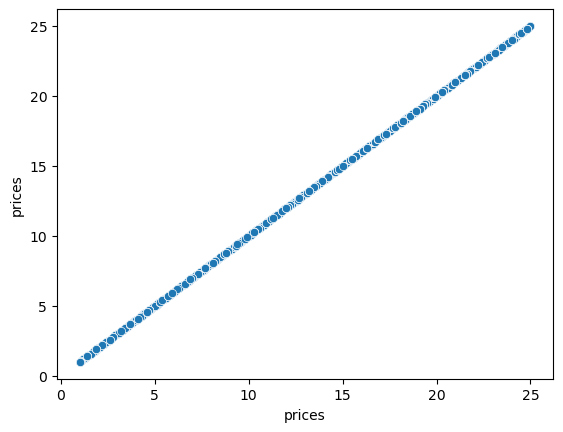

In [29]:
# scatterplot for prices

scatter = sns.scatterplot(x='prices', y='prices', data=df_vis)

In [30]:
#export scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'Scatter_prices.png'))

# erroneous data check

In [10]:
#unlimited columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


5127

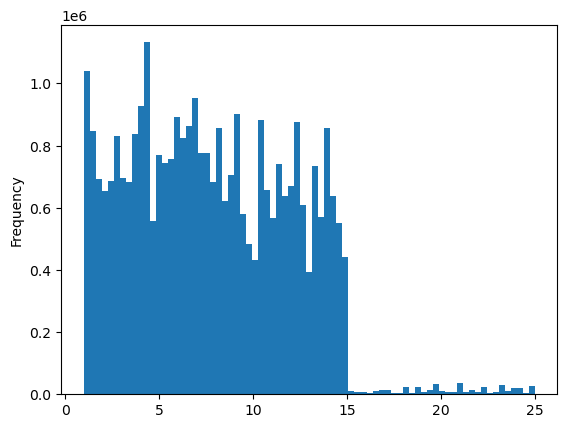

In [14]:
#plot hist of prices

hist = df_vis['prices'].plot.hist(bins=75)

In [15]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Price_Histogram.png'))

# Sample data

In [16]:
#np set random seed and split %
np.random.seed(4)
dev = np.random.rand(len(df_vis)) <=0.7

#define two splits, small is sample set: ~30% of data
big = df_vis[dev]
small = df_vis[~dev]

In [17]:
small.shape, (len(df_vis)*0.3)

((9729729, 27), 9730263.6)

In [18]:
len(big) + len(small), df_vis.shape

(32434212, (32434212, 27))

In [19]:
#define sample with only columns we need
df_sample = small[['prices', 'orders_day_of_week']]

In [26]:
df_sample.head()

,prices,orders_day_of_week
0,9.0,2
2,9.0,3
3,9.0,4
6,9.0,1
10,9.0,1


# plot sampled data

((9729729, 2), <Figure size 640x480 with 1 Axes>)

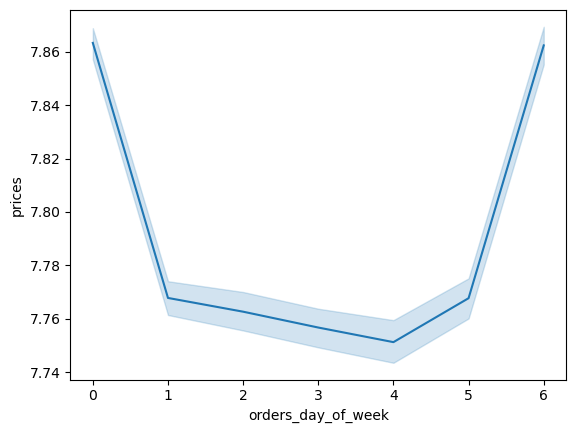

In [27]:
#create lineplot using seaborn

line = sns.lineplot(data=df_sample, x='orders_day_of_week', y='prices')
df_sample.shape, line.figure

In [28]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Line_Prices_DoW.png'))

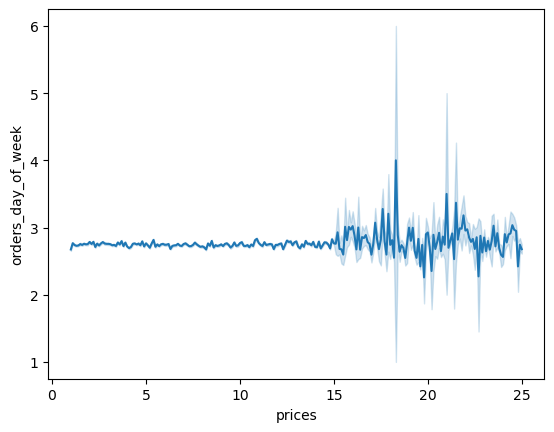

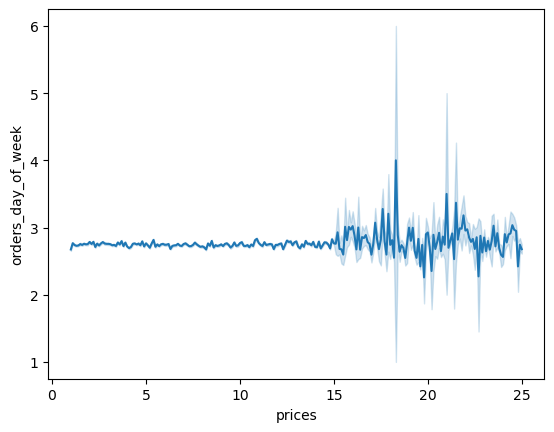

In [22]:
#line.figure